In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [48]:
#Single season
YEAR = 2021

data = pd.read_csv(
    'https://github.com/guga31bb/nflfastR-data/blob/master/data/play_by_play_' \
    + str(YEAR) + '.csv.gz?raw=True',compression='gzip', low_memory=False
    )

In [49]:
data.to_csv('2021pbp.csv')

In [50]:
data.shape

(24373, 372)

In [51]:
# 48,514 rows / 372 columns

In [52]:
data.head(10)

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
0,1,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,NaN,NaN,NaN,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,-1.399805,NaN,NaN,NaN,NaN,NaN,0.491433,-49.143299
3,76,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,0.032412,1.165133,5.803177,4.0,0.896654,0.125098,0.697346,30.265415
4,100,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,-1.532898,0.256036,4.147637,2.0,0.965009,0.965009,0.978253,2.174652
5,122,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,1,1,-0.345293,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,152,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,ARI,away,TEN,...,1,1,2.692890,0.567838,7.420427,4.0,1.000000,1.000000,0.458989,54.101130
7,181,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,ARI,away,TEN,...,1,1,-1.009908,NaN,NaN,NaN,NaN,NaN,0.419833,-41.983327
8,218,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,ARI,away,TEN,...,1,1,-0.511090,1.036891,10.339405,9.0,0.478471,0.079696,0.684949,31.505138
9,253,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,ARI,away,TEN,...,1,1,2.182015,0.517965,3.045047,1.0,1.000000,0.998799,0.775463,22.453719


In [53]:
# filter by column to get a clean summary of data we want to look at:
data.filter(
    ['yards_gained', 'ydstogo', 'air_yards']
).describe().round(2)


,yards_gained,ydstogo,air_yards
count,23265.00,24373.00,9560.00
mean,4.15,7.02,7.94
std,7.84,4.96,10.38
min,-24.00,0.00,-19.00
25%,0.00,2.00,1.00
50%,1.00,9.00,5.00
75%,6.00,10.00,12.00
max,91.00,39.00,59.00


In [54]:

data['air_yards'] = (
    np.where(
    data['air_yards'] < -10,   #instances where air yards are negative
    data['air_yards'].median(),   #replace the values w the median val ..could always drop too
    data['air_yards'])
    )

In [55]:
data.filter(
    ['yards_gained','ydstogo','air_yards']
    ).describe().round(2)

,yards_gained,ydstogo,air_yards
count,23265.00,24373.00,9560.00
mean,4.15,7.02,7.95
std,7.84,4.96,10.37
min,-24.00,0.00,-10.00
25%,0.00,2.00,1.00
50%,1.00,9.00,5.00
75%,6.00,10.00,12.00
max,91.00,39.00,59.00


Air Yards Data

In [56]:
df = data[
          (data['play_type'].isin(['no play', 'pass','run'])) &  # filter for certain plays
          (data['two_point_attempt']==0) &
          (data['epa'].isna()==False) 
          ]

In [57]:
ay_data = (
    df.groupby(['receiver','posteam'])[['air_yards']]
    .sum()
    .reset_index()
    .sort_values(by=['air_yards'],ascending=False)
    .reset_index(drop=True)
)
ay_data.head(10)    # most air yards in 2021 thru 9wks

,receiver,posteam,air_yards
0,T.Hill,KC,1093.0
1,C.Sutton,DEN,1031.0
2,D.Adams,GB,1014.0
3,M.Brown,BAL,999.0
4,Dj.Moore,CAR,984.0
5,J.Chase,CIN,961.0
6,B.Cooks,HOU,958.0
7,T.McLaurin,WAS,947.0
8,M.Evans,TB,925.0
9,C.Kupp,LA,902.0


Redzone Targets


In [58]:
# only passes in the redzone
rz = df[ 
    (df.yardline_100 <= 20) &
    (df.play_type == 'pass')
]
# only find redzone targets. count the no. of play ids when a receiver earned a target in the redzone
rz_tgts = (
    rz.groupby(['receiver','posteam'])[['play_id']]
    .count()
    .reset_index()
    .sort_values(by=['play_id'],ascending=False)
    .reset_index(drop=True)

    )
rz_tgts.head(10)

,receiver,posteam,play_id
0,C.Kupp,LA,22
1,C.Godwin,TB,16
2,R.Woods,LA,16
3,T.Higbee,LA,14
4,K.Allen,LAC,14
5,S.Diggs,BUF,13
6,M.Evans,TB,12
7,D.Waller,LV,12
8,T.Hill,KC,12
9,R.Seals-Jones,WAS,11


Carries inside the 5 yardline

In [59]:
inside_5 = data[
    (data['yardline_100'] <= 5) &
    (df['play_type'] == 'run')
]
carries_5 = (
    inside_5.groupby(['rusher','posteam'])[['play_id']]    # counts play ids/ carries
    .count()
    .reset_index()
    .sort_values(by=['play_id'],ascending=False)
    .reset_index(drop=True)
    )

carries_5.head(10)

,rusher,posteam,play_id
0,J.Taylor,IND,18
1,D.Harris,NE,12
2,E.Elliott,DAL,9
3,J.Conner,ARI,9
4,D.Henry,TEN,9
5,D.Henderson,LA,9
6,L.Fournette,TB,8
7,A.Kamara,NO,8
8,J.Mixon,CIN,7
9,A.Ekeler,LAC,7


Addind Custom Fields of Data

- Fantasy Data
create a new df that includes 2 point conversions

- create new df that has 2 point conversions

In [60]:
df_fantasy = data[
    (data.play_type.isin(['no_play','pass','run'])) &
    (data['epa'].isna()==False)
]
df_fantasy.sample(5)

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
15683,1932,2021_06_LA_NYG,2021101706,NYG,LA,REG,6,LA,away,NYG,...,0,1,1.275674,0.812629,1.714498,2.0,0.997651,0.997651,0.590644,40.935606
12782,578,2021_05_LA_SEA,2021100700,SEA,LA,REG,5,SEA,home,LA,...,0,0,-0.505346,NaN,NaN,NaN,NaN,NaN,0.479578,-47.957802
15065,4022,2021_06_DAL_NE,2021101710,NE,DAL,REG,6,DAL,away,NE,...,0,0,1.712596,0.253969,3.792588,1.0,1.000000,1.000000,0.979164,2.083582
18236,2511,2021_07_IND_SF,2021102410,SF,IND,REG,7,SF,home,IND,...,0,1,-0.386789,NaN,NaN,NaN,NaN,NaN,0.638110,-63.810951
1715,2361,2021_01_MIA_NE,2021091210,NE,MIA,REG,1,NE,home,MIA,...,0,1,-0.297766,NaN,NaN,NaN,NaN,NaN,0.430401,-43.040088


In [61]:
df_fantasy.two_point_conv_result.unique()

array([nan, 'success', 'failure'], dtype=object)

In [62]:
df_fantasy  = pd.get_dummies(df_fantasy, columns=['two_point_conv_result'])

In [63]:
pd.set_option('display.max_colwidth', None)

cols = [
        'desc',
        'two_point_conv_result_success',
        'two_point_conv_result_failure'
        ]

df_fantasy[cols][
          (df_fantasy.two_point_conv_result_success == 1) |
          (df_fantasy.two_point_conv_result_failure == 1)
          ].sample(5)

,desc,two_point_conv_result_success,two_point_conv_result_failure
4273,TWO-POINT CONVERSION ATTEMPT. 8-L.Jackson pass to 5-M.Brown is incomplete. ATTEMPT FAILS.,0,1
20396,"TWO-POINT CONVERSION ATTEMPT. 1-T.Tagovailoa pass to 88-M.Gesicki is complete. ATTEMPT SUCCEEDS. Pass caught 8 yds. into end zone, near left sideline.",1,0
13798,TWO-POINT CONVERSION ATTEMPT. 2-Z.Wilson pass to 82-J.Crowder is complete. ATTEMPT SUCCEEDS.,1,0
12707,TWO-POINT CONVERSION ATTEMPT. 8-L.Jackson pass to 89-M.Andrews is complete. ATTEMPT SUCCEEDS.,1,0
20948,(Pass formation) TWO-POINT CONVERSION ATTEMPT. 16-J.Goff pass to 88-T.Hockenson is incomplete. ATTEMPT FAILS.,0,1


In [64]:

df_fantasy['fpts_skill'] = (
    df_fantasy['yards_gained'] * 0.1 +
    df_fantasy['complete_pass'] * .5 +
    df_fantasy['touchdown'] * 6 +
    df_fantasy['two_point_conv_result_success'] * 2 +
    df_fantasy['fumble_lost'] * -2
    )

In [65]:

cols = ['desc','yards_gained','fpts_skill']
df_fantasy[cols].sample(10)

,desc,yards_gained,fpts_skill
5166,(11:57) (No Huddle) 8-D.Jones scrambles right end ran ob at WAS 44 for 2 yards (99-C.Young).,2.0,0.2
23571,(6:51) (Shotgun) 23-K.Drake left tackle to NYG 11 for 3 yards (75-D.Shelton; 98-A.Johnson).,3.0,0.3
14649,"(8:36) PENALTY on TEN-22-D.Henry, False Start, 5 yards, enforced at BUF 37 - No Play.",0.0,0.0
568,(7:46) (Shotgun) 25-C.Edwards-Helaire up the middle to KC 17 for -2 yards (58-M.McDowell).,-2.0,-0.2
760,(14:42) (Shotgun) 4-D.Prescott pass short left to 1-C.Wilson to DAL 7 for 2 yards (54-L.David).,2.0,0.7
17051,Timeout #1 by ATL at 06:03.,0.0,0.0
20572,(11:03) 30-A.Ekeler left tackle to LAC 22 for no gain (90-C.Barmore; 54-D.Hightower).,0.0,0.0
16632,(12:38) 31-D.Dallas right guard to PIT 24 for 5 yards (23-J.Haden).,5.0,0.5
21808,(11:42) (Shotgun) 5-T.Bridgewater pass short left to 85-A.Okwuegbunam to DEN 44 for 3 yards (36-D.Johnson) [90-M.Sweat].,3.0,0.8
7006,"(9:19) 22-D.Henry left tackle to IND 43 for 4 yards (58-B.Okereke, 53-D.Leonard).",4.0,0.4


In [66]:
receiving_fpts = (
    df_fantasy.groupby(
    ['receiver','posteam'])[['fpts_skill']]
    .sum()
    .reset_index()
    .sort_values(by='fpts_skill',ascending=False)
    .reset_index(drop=True)
    .rename(columns={'receiver':'player'}
    )
)
receiving_fpts.head(10)

,player,posteam,fpts_skill
0,C.Kupp,LA,198.9
1,J.Chase,CIN,151.5
2,T.Hill,KC,151.2
3,D.Samuel,SF,132.7
4,M.Brown,BAL,128.3
5,D.Adams,GB,125.6
6,D.Metcalf,SEA,125.5
7,M.Evans,TB,121.9
8,M.Pittman,IND,120.8
9,C.Godwin,TB,119.0


In [67]:
rushing_fpts = (
    df_fantasy.groupby(
    ['rusher','posteam'])[['fpts_skill']]
    .sum()
    .reset_index()
    .sort_values(by='fpts_skill',ascending=False)
    .reset_index(drop=True)
    .rename(columns={'rusher':'player'}
    )
)
rushing_fpts.head(10)

,player,posteam,fpts_skill
0,D.Henry,TEN,155.9
1,J.Taylor,IND,128.1
2,N.Chubb,CLE,106.1
3,J.Mixon,CIN,105.6
4,J.Conner,ARI,105.4
5,E.Elliott,DAL,94.4
6,D.Harris,NE,92.7
7,D.Henderson,LA,86.2
8,A.Ekeler,LAC,80.1
9,J.Robinson,JAX,78.2


In [68]:
fpts_skill = pd.merge(
    receiving_fpts, rushing_fpts, on=['player','posteam'], how='outer'   # join important here, 
    ).fillna(0)

fpts_skill.head(5)

,player,posteam,fpts_skill_x,fpts_skill_y
0,C.Kupp,LA,198.9,-0.5
1,J.Chase,CIN,151.5,0.7
2,T.Hill,KC,151.2,5.9
3,D.Samuel,SF,132.7,8.2
4,M.Brown,BAL,128.3,0.5


In [69]:
fpts_skill['total_fpts'] = (
    fpts_skill['fpts_skill_x'] + 
    fpts_skill['fpts_skill_y']
    )

fpts_skill.head(15)

,player,posteam,fpts_skill_x,fpts_skill_y,total_fpts
0,C.Kupp,LA,198.9,-0.5,198.4
1,J.Chase,CIN,151.5,0.7,152.2
2,T.Hill,KC,151.2,5.9,157.1
3,D.Samuel,SF,132.7,8.2,140.9
4,M.Brown,BAL,128.3,0.5,128.8
5,D.Adams,GB,125.6,0.0,125.6
6,D.Metcalf,SEA,125.5,0.0,125.5
7,M.Evans,TB,121.9,0.0,121.9
8,M.Pittman,IND,120.8,0.8,121.6
9,C.Godwin,TB,119.0,6.2,125.2


visualize the data

In [70]:
metrics = (
    df[
        (df.play_type == 'pass')
        ]
        .groupby(['receiver','posteam'])
        .agg({'play_id':'count','air_yards':'sum','complete_pass':'sum'})
        .reset_index()
        .sort_values(by=['air_yards'],ascending=False)
        .reset_index(drop=True)
        .rename(columns = {'play_id':'targets','receiver':'player','air_yards':'air yards','complete_pass':'receptions'})
        )

metrics.head()

,player,posteam,targets,air yards,receptions
0,T.Hill,KC,101,1093.0,68.0
1,C.Sutton,DEN,64,1031.0,41.0
2,D.Adams,GB,87,1014.0,58.0
3,M.Brown,BAL,69,999.0,46.0
4,Dj.Moore,CAR,88,984.0,53.0


In [71]:
fpts_skill.head()

,player,posteam,fpts_skill_x,fpts_skill_y,total_fpts
0,C.Kupp,LA,198.9,-0.5,198.4
1,J.Chase,CIN,151.5,0.7,152.2
2,T.Hill,KC,151.2,5.9,157.1
3,D.Samuel,SF,132.7,8.2,140.9
4,M.Brown,BAL,128.3,0.5,128.8


In [72]:

viz = pd.merge(
    fpts_skill, metrics, on=['player','posteam']
    ).sort_values(by=['total_fpts'],ascending=False).reset_index(drop=True)

viz.head(10)

,player,posteam,fpts_skill_x,fpts_skill_y,total_fpts,targets,air yards,receptions
0,C.Kupp,LA,198.9,-0.5,198.4,103,902.0,74.0
1,D.Henry,TEN,24.4,155.9,180.3,20,-3.0,18.0
2,J.Taylor,IND,46.8,128.1,174.9,27,-37.0,23.0
3,T.Hill,KC,151.2,5.9,157.1,101,1093.0,68.0
4,J.Chase,CIN,151.5,0.7,152.2,73,961.0,44.0
5,J.Mixon,CIN,42.4,105.6,148.0,26,-26.0,22.0
6,A.Ekeler,LAC,66.5,80.1,146.6,45,57.0,36.0
7,A.Kamara,NO,71.0,71.0,142.0,44,29.0,32.0
8,D.Samuel,SF,132.7,8.2,140.9,81,658.0,49.0
9,C.Patterson,ATL,100.9,39.8,140.7,47,183.0,38.0


In [73]:
pip install adjustText

Note: you may need to restart the kernel to use updated packages.


In [74]:

from adjustText import adjust_text

In [97]:
# get all receivers names, could use roster data file in nflverse also
receivers = receiving_fpts.player.to_list()[:30]
viz = viz[(viz.player.isin(receivers))]

viz


,player,posteam,fpts_skill_x,fpts_skill_y,total_fpts,targets,air yards,receptions,color
0,C.Kupp,LA,198.9,-0.5,198.4,103,902.0,74.0,#002147
3,T.Hill,KC,151.2,5.9,157.1,101,1093.0,68.0,#CA2430
4,J.Chase,CIN,151.5,0.7,152.2,73,961.0,44.0,#FB4F14
8,D.Samuel,SF,132.7,8.2,140.9,81,658.0,49.0,#C9243F
9,C.Patterson,ATL,100.9,39.8,140.7,47,183.0,38.0,#A71930
12,M.Brown,BAL,128.3,0.5,128.8,69,999.0,46.0,#241773
16,D.Adams,GB,125.6,0.0,125.6,87,1014.0,58.0,#24423C
17,D.Metcalf,SEA,125.5,0.0,125.5,56,632.0,39.0,#7AC142
18,C.Godwin,TB,119.0,6.2,125.2,69,581.0,50.0,#D40909
20,M.Evans,TB,121.9,0.0,121.9,63,925.0,39.0,#D40909


In [102]:
# not sure why the following 4 players show up in the list of top 30?
viz = viz[
    -((viz.player == 'M.Williams') & (viz.posteam == 'ARI')) &
    -((viz.player == 'T.Hill') & (viz.posteam == 'NO')) &
    -((viz.player == 'M.Brown') & (viz.posteam == 'MIA')) &
    -((viz.player == 'J.Jefferson') & (viz.posteam == 'DET')) 
]

# removing cpatt bc of his runing back designation in fantasy and may be skewing the data slightly
viz = viz[-((viz.player == 'C.Patterson'))]

In [103]:
COLORS = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

Text(0.8, 0.06, 'Data: nflfastR')

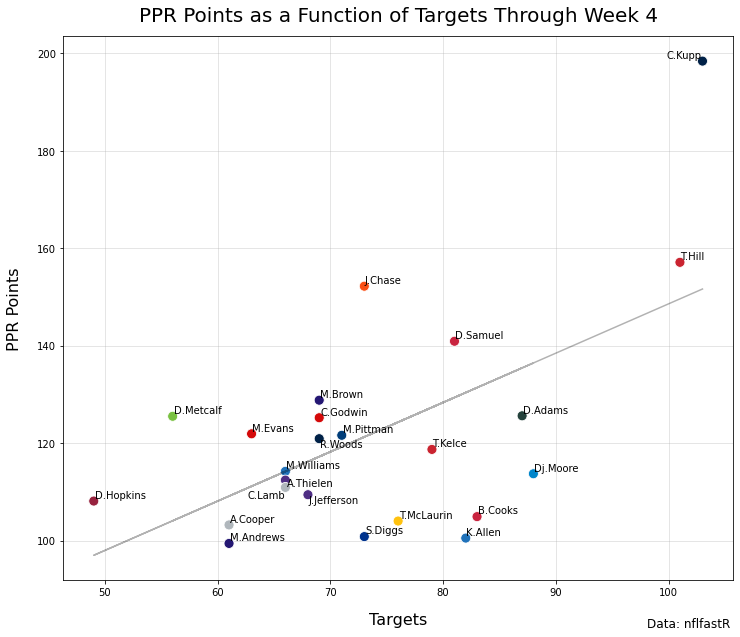

In [104]:
#Create a figure
fig, ax = plt.subplots(figsize=(12,10))

#Map the COLORS dictionary to the posteam column
viz['color'] = viz['posteam'].map(COLORS)

#Create the scatterplot
sns.scatterplot(x = viz.targets, y = viz.total_fpts, c = viz.color,s=100)

#Add labels to each data point
texts = [plt.text(x0,y0,name,ha='right',va='bottom') for x0,y0,name in zip(
    viz.targets, viz.total_fpts, viz.player)]

adjust_text(texts)

#Add grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Add trend line
m, b = np.polyfit(viz.targets, viz.total_fpts, 1)

plt.plot(viz.targets, m*viz.targets + b, 'k', alpha=.3,linestyle='-')

#Add title, labels, and cite the data source
ax.set_title('PPR Points as a Function of Targets Through Week 4',fontsize=20,pad=15)
ax.set_xlabel('Targets',fontsize=16,labelpad=15)
ax.set_ylabel('PPR Points',fontsize=16,labelpad=15)
plt.figtext(.8,.06,'Data: nflfastR',fontsize=12)

#Save figure if you wish
#plt.savefig('_name_.png',dpi=300)

Text(0.8, 0.06, 'Data: nflfastR')

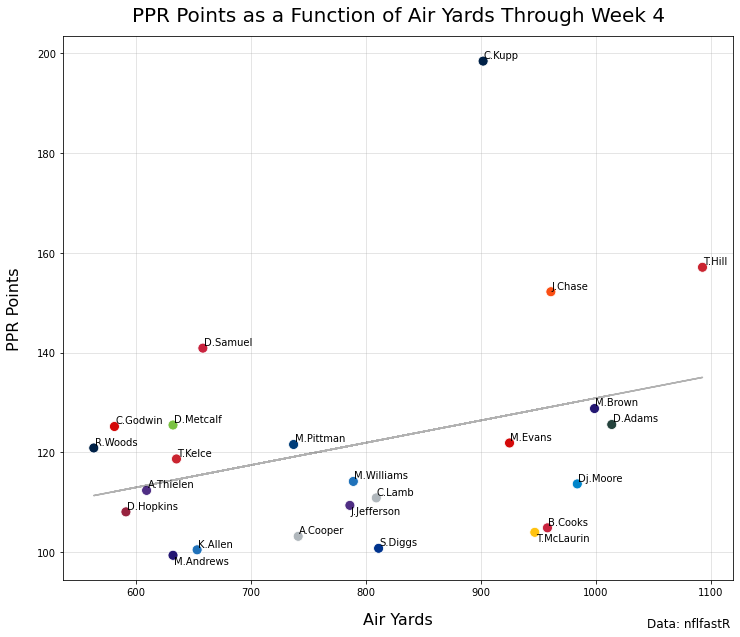

In [105]:
#Create a figure
fig, ax = plt.subplots(figsize=(12,10))

#Map the COLORS dictionary to the posteam column
viz['color'] = viz['posteam'].map(COLORS)

#Subset the top 30 players by wopr (we don't want a crowded plot)
viz = viz[(viz.player.isin(receivers))]

#Create the scatterplot
sns.scatterplot(x = viz['air yards'], y = viz.total_fpts, c = viz.color,s=100)

#Add labels to each data point
texts = [plt.text(x0,y0,name,ha='right',va='bottom') for x0,y0,name in zip(
    viz['air yards'], viz.total_fpts, viz.player)]

adjust_text(texts)

#Add grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Add trend lines for the metrics
m, b = np.polyfit(viz['air yards'], viz.total_fpts, 1)

plt.plot(viz['air yards'], m*viz['air yards'] + b, 'k', alpha=.3,linestyle='-')

#Add title, labels, and cite the data source
ax.set_title('PPR Points as a Function of Air Yards Through Week 4',fontsize=20,pad=15)
ax.set_xlabel('Air Yards',fontsize=16,labelpad=15)
ax.set_ylabel('PPR Points',fontsize=16,labelpad=15)
plt.figtext(.8,.06,'Data: nflfastR',fontsize=12)

#Save figure if you wish
#plt.savefig('_name_.png',dpi=300)

In [106]:

def ay_distribution(receiver, team):
  
  '''
  This function plots the air yards distribution
  for any given NFL player
  
  Parameters: 
    receiver (str): The name of the player in nflfastR
    format (J.Doe) 
  
    team (str): The team that receiver is currently on

  '''

  #Create a figure
  fig, ax = plt.subplots(figsize=(10,10))

  #Subset our data to include passes only for the
  #player and team we choose
  ay_dist = data[
                 (data.play_type=='pass') &
                 (data.qb_dropback==1) &
                 (data.epa.isna()==False) &
                 (data.receiver==receiver) &
                 (data.posteam==team)
                 ]

  #Add grid
  ax.grid(zorder=0,alpha=.4)
  ax.set_axisbelow(True)

  #Set x-axis limits
  ax.set_xlim(-10,50)

  #Add colors
  COLORS = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D',
            'CAR':'#0085CA','CHI':'#00143F','CIN':'#FB4F14','CLE':'#FB4F14',
            'DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
            'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430',
            'LA':'#002147','LAC':'#2072BA','LV':'#C4C9CC','MIA':'#0091A0',
            'MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
            'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142',
            'SF':'#C9243F','TB':'#D40909','TEN':'#4095D1','WAS':'#FFC20F'}

  #Create plot
  sns.kdeplot(ay_dist.air_yards,fill=True,color=COLORS.get(team))

  #Add title, labels, and cite the data source.
  #the formatted string allows to pass the receiver
  #parameter input to the title
  plt.title(f"{receiver}'s Air Yards Distribution",fontsize=20)
  plt.xlabel('Air Yards',fontsize=14)
  plt.ylabel('Density',fontsize=14)
  plt.figtext(0.8,0.06,'Data: nflfastR')

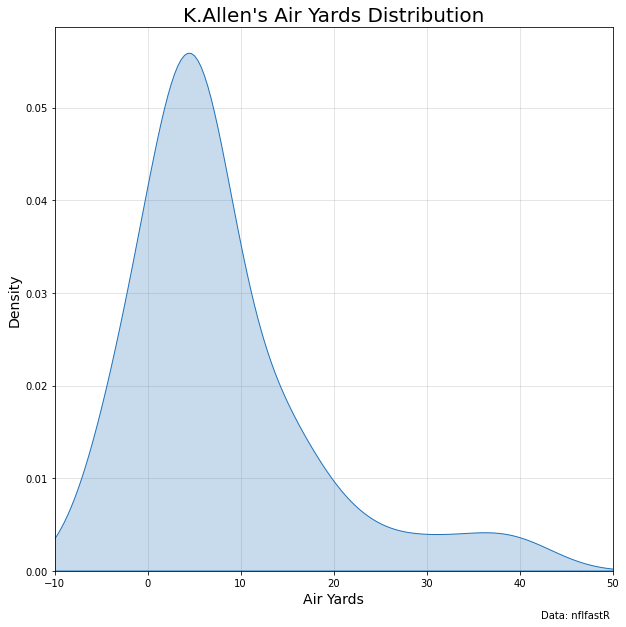

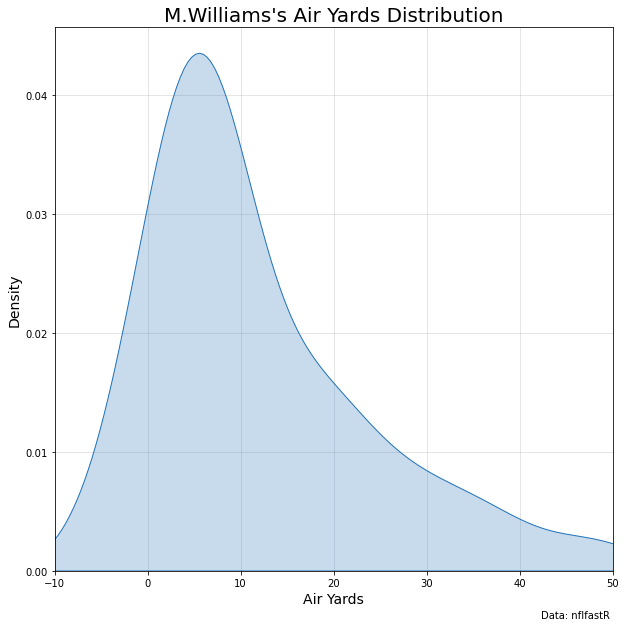

In [108]:
ay_distribution('K.Allen','LAC')
ay_distribution('M.Williams','LAC')